# Import Package and the Dream Data

In [1]:
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex = True)
plt.style.use('ggplot')

Importantly, we import the file using the ```struct_as_record``` keyword set to False. This makes it easier to traverse the inner arrays. It's not as Pythonic, but it's better than the alternative.

In [2]:
data = scio.loadmat('Stevenson_2011_e1.mat', struct_as_record=False)

We can see the inner structs via a list:

In [11]:
list(data)

['__header__',
 '__version__',
 '__globals__',
 'Subject',
 'UniqueID',
 'DREAMdate',
 'Publication',
 'Equipment',
 'Task',
 'Feedback',
 'Orientation',
 'Info']

# Extract Data

## Extract a subject

There are two subjects in this dataset. We'll just extract the first one (I believe the second one has no metadata).

In [12]:
subject = data['Subject'][0, 0]

# Extract a Trial

The data for a subject are divided into different trials. Let's extract all the trials for this subject.

In [13]:
trials = data['Subject'][0,0].Trial.ravel()
n_trials = trials.size
print("Number of Trials: ", n_trials)

Number of Trials:  194


Next, we'll pick a random trial and extract the timestamps, the location of the target, and the path of the animal's hand. 

In [6]:
def get_timestamps(trial_num):
    trial = trials[trial_num]
    time = trial.Time.ravel()
    return time

def extract_locations(trial_num):
    trial = trials[trial_num]
    # extract target
    target_indices = ~np.isnan(trial.TargetPos)
    target = trial.TargetPos[target_indices[:, 0]]
    target_x = target[:, 0]
    target_y = target[:, 1]
    # extract cursor position
    cursor_position = np.array([cursor.ravel() for cursor in trial.CursorPos.ravel()])
    cursor_x = cursor_position[:, 0]
    cursor_y = cursor_position[:, 1]
    # extract hand position
    hand_position = trial.HandPos
    hand_x = hand_position[:, 0]
    hand_y = hand_position[:, 1]
    return (target_x, target_y), (hand_x, hand_y), (cursor_x, cursor_y)

In [22]:
def plot_trial(trial_num, center):
    target, hand, _ = extract_locations(trial_num)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    ax.scatter(target[0], target[1], color='k', s=60, zorder=10)
    ax.scatter(hand[0], hand[1], c=np.cos(np.arange(hand[0].size) * (np.pi/hand[0].size)), s=30)
    ax.set_xlim([center[0] - 0.15, center[0] + 0.15])
    ax.set_ylim([center[1] - 0.15, center[1] + 0.15])
    ax.set_facecolor('white')
    for spine in ax.spines:
        ax.spines[spine].set_edgecolor('k')
    # labels
    ax.set_title(r'\textbf{Trial %s}' %trial_num, fontsize=30)
    ax.set_xlabel(r'\textbf{X Position}', fontsize=30)
    ax.set_ylabel(r'\textbf{Y Position}', fontsize=30)
    # remove axis labels
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    return ax

I'm hard coding this, but this is the center target. 

In [23]:
center = np.array([-0.0165, -0.306])

We'll plot the target and the pathway of the hand on a random trial.

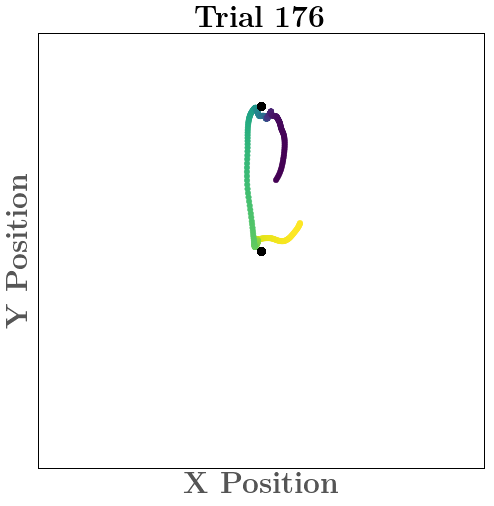

In [24]:
# pick a random trial
trial = np.random.randint(n_trials)
ax = plot_trial(trial, center)
plt.show()

Let's look at the following trial:

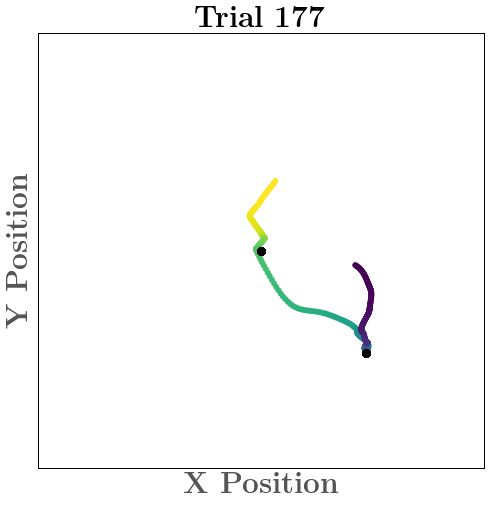

In [25]:
# pick a random trial
next_trial = trial + 1
ax2 = plot_trial(next_trial, center)
plt.show()

## Extract Spikes

In [58]:
def get_spikes(trial_num):
    trial = trials[trial_num]
    neurons = trial.Neuron.ravel()
    spikes = {neuron_id : spike_times.Spike.ravel() for neuron_id, spike_times in enumerate(neurons)}
    return spikes

def plot_spike_raster(trial_num):
    spikes = get_spikes(trial_num)
    # plot spike raster
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    for neuron_id in spikes.keys():
        spike_times = spikes[neuron_id]
        tags = np.repeat(neuron_id, spike_times.size)
        ax.scatter(spike_times, tags, color = 'k', marker='|', linewidth=1)
    ax.set_facecolor('white')
    for spine in ax.spines:
        ax.spines[spine].set_edgecolor('k')
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.tick_params(labelsize=20)
    ax.set_xlabel(r'\textbf{Time (s)}', fontsize=30)
    ax.set_title(r'\textbf{Trial %s Spike Raster}' %trial_num, fontsize=35)
    return ax

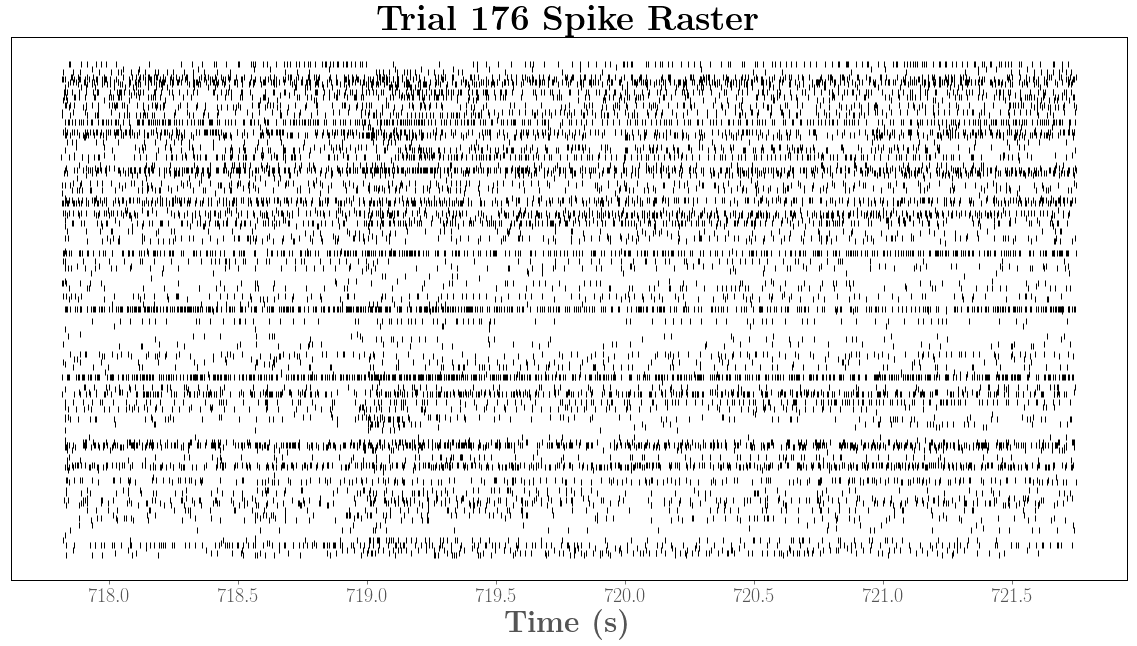

In [59]:
ax = plot_spike_raster(trial)
plt.show()

In [61]:
get_timestamps(n_trials-1)

array([787.2155, 787.2255, 787.2355, 787.2455, 787.2555, 787.2655,
       787.2755, 787.2855, 787.2955, 787.3055, 787.3155, 787.3255,
       787.3355, 787.3455, 787.3555, 787.3655, 787.3755, 787.3855,
       787.3955, 787.4055, 787.4155, 787.4255, 787.4355, 787.4455,
       787.4555, 787.4655, 787.4755, 787.4855, 787.4955, 787.5055,
       787.5155, 787.5255, 787.5355, 787.5455, 787.5555, 787.5655,
       787.5755, 787.5855, 787.5955, 787.6055, 787.6155, 787.6255,
       787.6355, 787.6455, 787.6555, 787.6655, 787.6755, 787.6855,
       787.6955, 787.7055, 787.7155, 787.7255, 787.7355, 787.7455,
       787.7555, 787.7655, 787.7755, 787.7855, 787.7955, 787.8055,
       787.8155, 787.8255, 787.8355, 787.8455, 787.8555, 787.8655,
       787.8755, 787.8855, 787.8955, 787.9055, 787.9155, 787.9255,
       787.9355, 787.9455, 787.9555, 787.9655, 787.9755, 787.9855,
       787.9955, 788.0055, 788.0155, 788.0255, 788.0355, 788.0455,
       788.0555, 788.0655, 788.0755, 788.0855, 788.0955, 788.1